# Elliptical Orbital Motion




https://www.youtube.com/watch?v=xdIjYBtnvZU


https://www.wolframalpha.com/input/?i=sin%28x%29+%3D+m*cos%28x%29+%2B+c

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [3]:
# Set Diameter
d = 1000.0

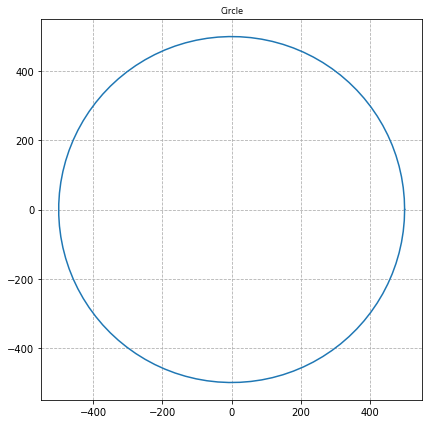

In [4]:
theta = np.linspace(0, 2*np.pi, 100)

r = d/2

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1, figsize=(7,7))



ax.plot(x1, x2)
ax.set_aspect(1)

#plt.xlim(-1.25,1.25)
#plt.ylim(-1.25,1.25)
plt.grid(linestyle='--')
plt.title('Circle', fontsize=8)
plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')

### Points on the circle are given by the coordinate








In [5]:
# all points on the circle
xy = np.concatenate(([x1],[x2]), axis=0).T

# Elliptical Point: Select Random Point in circle - NOT at the origin
def random_point(center, radius):
    """
    Return a random point in a circle
    """
    center_x = center[0]
    center_y = center[1]
    
    # random angle
    alpha = 2 * np.pi * random.random()
    
    # random radius
    ra = radius * np.sqrt(random.random())
    
    # calculate coordinates
    x_random = ra * np.cos(alpha) + center_x
    y_random = ra * np.sin(alpha) + center_y
    
    return (x_random, y_random)

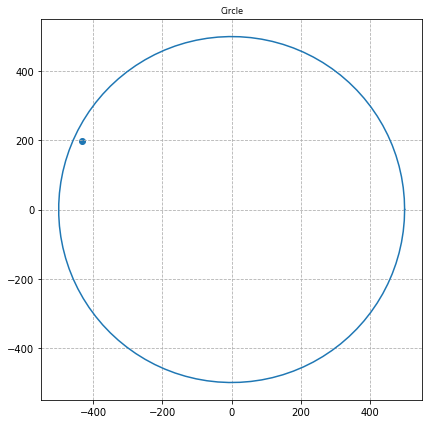

In [6]:
ran = random_point([0,0], r)

fig, ax = plt.subplots(1, figsize=(7,7))
ax.plot(x1, x2)
ax.scatter(*ran)
ax.set_aspect(1)

#plt.xlim(-1.25,1.25)
#plt.ylim(-1.25,1.25)
plt.grid(linestyle='--')
plt.title('Circle', fontsize=8)
plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')

circle = np.array((ran, x1, x2))

# Compute µ evenly spaced lines from the focal point to the circle 

In [7]:
def lines_from_eccentric_point(circle, r, µ=100):
    """
    Return:
        lines from eccentric point
        
    Parameters:
        µ: number of lines
        circle
        radius
    """
    
    # Random Lines given a point 
    eccentric = circle[0]
    µ = µ/2

    lines = []
    angle = 0 # on X axis
    for i in range(int(µ)):
        step = 360 / µ
    

        # compute slope
        m = np.tan(np.degrees(angle))
        # solve for c
        c = eccentric[1] - m*eccentric[0]

        # compute location on circle
        # y=mx + c  == sin(x)=cos(x)
        yy = r*np.sin(angle)
        xx = r*np.cos(angle)

        # record line
        lines.append([m,c,xx,yy])
        # update angle
        angle = angle + step
        





    return lines






    fig, ax = plt.subplots(1, figsize=(7,7))
    plt.grid(linestyle='--')
    ax.set_aspect(1)





    ax.plot(lines[0][0:2], lines[0][2:4])

    ax.scatter(circle[0][0], circle[0][1], c='m')
    ax.plot(circle[1], circle[2]);

        
lines = lines_from_eccentric_point(circle=circle, r=r)
        

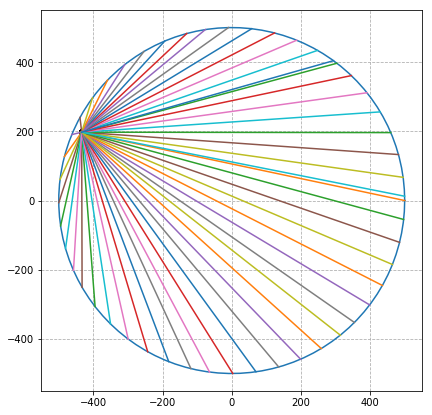

In [8]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.grid(linestyle='--')
ax.set_aspect(1)


ax.scatter(circle[0][0], circle[0][1], c='black')
ax.plot(circle[1], circle[2])

for i in range(len(lines)):
    ax.scatter(circle[0][0], circle[0][1], c='black')
    ax.plot([np.array(lines)[:,2][i],circle[0][0]], [np.array(lines)[:,3][i],circle[0][1]], '-', alpha=1)
    
   



plt.show()

# Rotate Lines 90˚

In [14]:

def rotate_lines_90(lines, circle):
    
    x_eccentric = circle[0][0]
    y_eccentric = circle[0][1]

    for i in range(len(lines)):
        
        # compute midpoint
        mid_x = (x_eccentric + lines[i][2])/2
        mid_y = (y_eccentric + lines[i][3])/2
        
        # perpendicular slope
        mp = -1/(lines[i][0])
        
        # half-line length
        dist = np.sqrt((mid_x-lines[i][2])**2 + (mid_y-lines[i][3])**2)
        
        # calculate C = y - mx 
        cp = mid_y - mp*mid_x
        
        # compute two new points on new lines
        
        
lines[1][]

[1.4941048168919555, 845.5069095688303, 304.1756572661273, 396.8339319245766]

In [18]:
lines[10][2]

-483.62529413694307

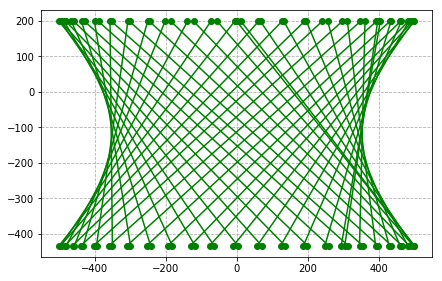

In [9]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.grid(linestyle='--')
ax.set_aspect(1)


for i in range(len(lines)):
    ax.plot([np.array(lines)[:,2][i],np.array(lines)[:,3][i]], [circle[0][0],circle[0][1]], 'go-')
    # plt.plot(x[i:i+2], y[i:i+2], 'ro-')

    
plt.show()

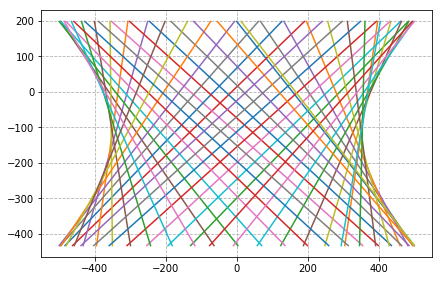

In [10]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.grid(linestyle='--')
ax.set_aspect(1)
ax.plot([np.array(lines)[:,2], np.array(lines)[:,3]],circle[0]);

# Equation 

$$ \sin(\theta) = \cos(\theta) $$

$$ \frac{\sin(\theta)}{\cos(\theta)} = \frac{\cos(\theta)}{\cos(\theta)} $$

$$ \tan(\theta) = 1 $$

$$ \theta = \frac{\pi}{4} + (\pi n)$$

## Vertical Line

#### Circle Equation
$$\sin(\theta) = \cos(\theta) $$

#### Horizontal line
$$ x = xe $$

$$\therefore \sin(\theta) = xe $$
$$\therefore \theta = \arcsin(xe) $$

## Solve for X and Y in Circle

$$x = r*\cos(\theta)$$
$$y = r*\sin(\theta)$$



## Midpoint of lines
$$\left( \dfrac{x_1+x_2}{2} , \dfrac{y_1+y_2}{2} \right) $$

## Perpendicular Slope
$$m_p = \frac{-1}{m}$$

## Distance
$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$

## Pythagoras
$$a^2+b^2=c^2 \implies (y_1 - y_2)^2 + (x_1 - x_2)^2 = distance$$
$$\therefore $$

NameError: name 'm' is not defined

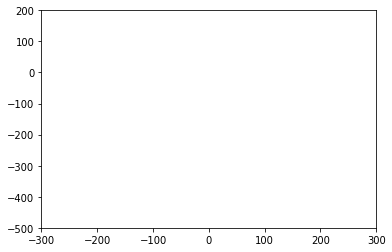

In [11]:
# plot
fig, ax = plt.subplots(1)
plt.xlim(-300,300)
plt.ylim(-500,200)

xx = np.linspace(-300,300,1000)
yy = m*xx + c

ax.plot(xx,yy)
ax.scatter(eccentric[0], eccentric[1], c='orange');